In [13]:
from benchmark_new import *
%matplotlib inline

In [11]:
set(data.index.get_level_values('alpha'))

{0.5, 0.75, 1.0, 1.25, 1.5}

In [30]:
helpers = 'best_affinity_diverse'
mcss = '../../../mcss_sizes.pkl'

data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
data = add_correct(data, thresh = 2.0)
#data = filter_to_ubiquitous_ligands(data)
data = data[  (data.index.get_level_values('protein') != 'A2AR')]
data = data[data.mcss < 0.5]
data = data[data.best_correct]

ligand = data.xs((helpers, 'crystal', 20, 'mcss_contact_hbond_sb', 1.0),
                  level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
print(ligand.shape[0])
family_ligand = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
family_target = target.groupby(level=list(range(len(target.index.levels)-1))).mean()

284


# Overall performance

In [31]:
dfs = []
for name, df in {'Ligand': ligand.groupby('version').mean(),
                 'Target': target.groupby('version').mean(),
                 'Drug-Target': drug_average(family_target),
                 'Drug-Ligand': drug_average(family_ligand)}.items():
    df = df.copy()
    df['metric'] = name
    dfs += [df]

dfs = pd.concat(dfs)
dfs['version'] = dfs.index.get_level_values('version')
dfs = dfs.set_index(['metric', 'version'])
dfs.filter(regex='correct')

,,combind_correct,glide_correct,best_correct
metric,version,,,
Ligand,stats21,0.658451,0.605634,1.0
Target,stats21,0.634534,0.571256,1.0
Drug-Target,stats21,0.608201,0.503109,1.0
Drug-Ligand,stats21,0.640011,0.527341,1.0


# Performance by Family

In [4]:
family_ligand.filter(regex='correct')

combind_correct  glide_correct  best_correct
version family                                                        
stats21 GPCR                     0.722222       0.444444           1.0
        Nuclear Receptor         0.809524       0.833333           1.0
        Transporter              0.583333       0.500000           1.0
        Peptidase                0.567164       0.552239           1.0
        Kinase                   0.646341       0.695122           1.0
        Other                    0.460317       0.460317           1.0

In [5]:
family_target.filter(regex='correct')

combind_correct  glide_correct  best_correct
version family                                                        
stats21 GPCR                     0.646667       0.396667           1.0
        Nuclear Receptor         0.792778       0.849444           1.0
        Transporter              0.404762       0.392857           1.0
        Peptidase                0.434273       0.591019           1.0
        Kinase                   0.684481       0.717621           1.0
        Other                    0.455759       0.446154           1.0

# Performance by target

In [6]:
dumbell_plot(target.loc['stats24'], 'rmsd')

KeyError: 'stats24'

In [ ]:
dumbell_plot(target.loc['stats19'], 'correct')

In [ ]:
dumbell_plot(target.loc['stats21'], 'correct')

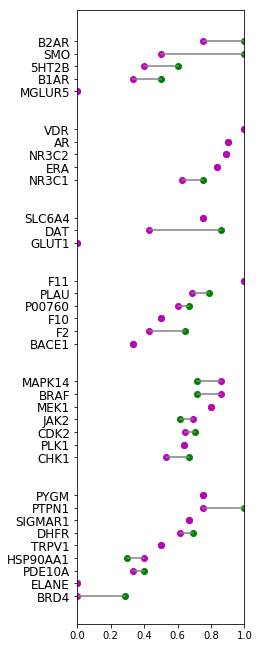

In [29]:
dumbell_plot(target.loc['stats21'], 'correct')